# **Análise de tweets brasileiros sobre a COVID-19**


# Apresentação

> ### Resumo
Este documento tem o objetivo de apresentar uma análise exploratória de tweets gerados por brasileiros, e que envolvem o tema COVID-19, para extrair e visualizar informações úteis com o intuito de compreender as principais dúvidas das pessoas sobre esta pandemia.

> ### Autores
Alunos de pós-graduação em Ciência de Dados da Universidade do Estado do Amazonas:
1.   [Patrick Tapajós Pinto](https://www.linkedin.com/in/patrick-tapajos-pinto/)
2.   [Wladimir Barroso Guedes de Araújo Neto](https://www.linkedin.com/in/wladneto/)

> ### Ferramentas Utilizadas
A análise será efetuada utilizando-se a linguagem de programação python e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados.


# Introdução

><div align="justify">
O surto do COVID-19 na China foi noticiado em dezembro de 2019. A Organização Mundial de Saúde (OMS) declarou estado de emergência devido ao rápido espalhamento do vírus no mundo. Na América Latina, o Brasil é o país mais afetado pela doença. De acordo com o relatório pela OMS, houve o registro de 347,398 casos de infectados e de 22,013 mortes no Brasil.
<br>
Devido à rápida propagação da doença no mundo, as plataformas de mídias sociais como Twitter, Facebook e Instagram tornaram-se locais onde ocorre uma intensa e contínua troca de informações entre órgãos governamentais, profissionais da área de saúde e o público em geral.
Um representativo número de estudos científicos têm mostrado que as mídias sociais podem desempenhar um papel importante como fonte de dados para análise de crises e também para entender atitudes e comportamentos das pessoas durante uma pandemia.
<br>
Com o objetivo de auxiliar o monitoramento da saúde pública e também para dar suporte a tomada de decisão de profissionais, diversos sistemas de monitoramento são desenvolvidos para classificar grandes quantidades de dados oriundos das mídias sociais. Estes dados podem ser
empregados para identificar rapidamente os pensamentos, atitudes, sentimentos e tópicos que ocupam as mentes das pessoas em relação à pandemia do COVID-19. A análise sistemática desses dados pode ajudar os governantes, profissionais da saúde e o público em geral a identificar
questões que mais lhes interessam e tratá-las de maneira mais apropriada.
<br>
Dentre as plataformas de mídias sociais, o Twitter é uma das mais populares. De acordo com, existe aproximadamente 200 milhões de usuários registrados nesta plataforma e que publicam mais de 500 milhões de tuítes diariamente. Portanto, pode-se aproveitar desse alto volume e troca frequente de informações para se conhecer as dúvidas sobre determinadas doenças. Como exemplo de importância desta plataforma em situações de crise, a atual pandemia de COVID-19 foi primeiro comunicada para a populacão na China através do site Weibo, que é o correspondente ao Twitter na China, antes mesmo do pronunciamento oficial das autoridades locais. Recentemente, existe um grande interesse de pesquisadores investigando o uso do Twitter para pesquisas relacionadas à saúde pública.
</div>


# Coleta de Dados
> Os dados foram coletados e disponibilizados pelo Prof. Dr. Tiago de Melo e contém cerca de 1.7 milhões de tweets coletados durante o primeiro semestre de 2020.
<br>
<br>
Link para download dos dados: http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz. 

# Preparação: Importações e funções utilizadas

In [1]:
# Importação das bibliotecas necessárias para a análise e visualização de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conjunto de bibliotecas e programas para processamento simbólico e estatístico de linguagem natural 
import nltk

# Magic word, faz com que os gráficos sejam mostrados diretamente no notebook
%matplotlib inline

# Download de módulo necessário para gerar WordCloud
nltk.download('stopwords')

# Download de módulo necessário para separar sentenças (sent-tokenize)
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Montagem de drive para carregamento de dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
# Funções para geração de WordCloud com rápida visualização dos termos encontrados nos tweets (e por diversão :)) 

# Importação de libs necessárias
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Carregando as stopwords do idioma português
sw_br = stopwords.words('portuguese');

sw_br.extend(['http','https', 'né'])

# Função para exclusão de stopwords e geração de lista com os termos encontrados
def gen_words(text_list):
  words = []
  for s in text_list:
    for p in word_tokenize(s.lower()):
      if p not in sw_br:
        words.append(p)
  words = str(words)
  return words

# Função para exibir a imagem com as palavras
def gen_img_word_cloud(text_list):
  wordcloud = WordCloud(width=1000, height=500, margin=0).generate(gen_words(text_list))
  plt.figure(figsize=(20, 11))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.margins(x=0, y=0)


# Visão Geral dos Dados

Vamos efetuar o carregamento do dataset através do método read_csv, bastando informar o local do arquivo que contém os dados. 

In [4]:
# Dados brutos da fonte
raw_data = pd.read_csv('/content/drive/Shared drives/pgds_dataset/covid19-tweets.csv')
raw_data

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0,4066,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3,5307,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0,1000,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']


In [ ]:
#Atributo shape, informa a quantidade de linhas (registros) e colunas

raw_data.shape

(1658825, 13)

Como é possível visualizar acima, o dataset possui 1.658.825 registros distribuídos entre 13 colunas, as quais possuem dados sobre o texto do tweet, quem o escreveu, a data, sua localização, as 'hashtags' utilizadas, entre outras informações.
<br>
Além disso, é possível verificar que algumas colunas possuem dados com o valor NaN, ou seja, não foi possível verificar um valor válido para determinado registro nesta coluna. 
<br>
Logo, nem todos os registros tem todos os dados preenchidos.

In [ ]:
#Confirmando que há dados NaN
print(raw_data.isnull().values.any())
print(raw_data.notna().values.any())

True
True


Vamos verificar outras informações sobre o dataset utilizando funções estatísticas que o próprio Pandas fornece.

In [ ]:
#Confirmando a quantidade de registros, uma vez que o método count ignora valores None, NaN e NaT
raw_data.count()

data          1658825
usuario       1658768
apelido       1658825
texto         1658825
retweet       1658825
seguidores    1658825
idioma        1658825
lugar           74605
pais            74600
sigla           74595
latitude         8720
longitude        8720
hashtags      1658825
dtype: int64

Para confirmar o período dos tweets presente no dataset, podemos verificar o valor mínimo e máximo da informação na coluna de data. Como esta informação é do tipo String, podemos utilizar uma função do Pandas para transformá-la em um objeto do tipo Date e modificar seu formato de leitura para o utilizado no Brasil.

In [ ]:
print('Dia inicial: ', pd.to_datetime(raw_data['data'].min()).strftime('%d/%m/%Y %H:%M:%S'))
print('Dia final: ', pd.to_datetime(raw_data['data'].max()).strftime('%d/%m/%Y %H:%M:%S'))

Dia inicial:  01/01/2020 00:42:12
Dia final:  28/07/2020 17:19:44


Podemos utilizar a função describe para verificar alguns dados estatisticos do dataset. Neste caso, vamos utilizar em todo o dataset, então, para que ele processe dados do tipo String, iremos informar à função o parâmetro 'O', de Object.

In [ ]:
raw_data.describe(include = ['O'])

,data,usuario,apelido,texto,idioma,lugar,pais,sigla,hashtags
count,1658825,1658768,1658825,1658825,1658825,74605,74600,74595,1658825
unique,1202322,632601,774516,1653599,59,4500,121,120,63838
top,2020-04-15 21:00:00,.,Lusa_noticias,covid 19? desculpa eu entendi convite pra fica...,pt,Rio de Janeiro,Brazil,BR,[]
freq,27,1624,1404,120,1586796,8443,67247,67247,1495569


Podemos verificar a diferença entre os dados da linha **count** e da linha **unique**, que indica que há dados repetidos. 
<br>
No caso da data, por exemplo, podemos observar que foram escritos tuítes (simultaneamente) em um mesmo horário 15-04-2020, às 21 horas 'em ponto', totalizando 27 vezes, como mostra a linha **freq**.
<br>
Já com relação à usuário, podemos inferir que um alguns tuitaram mais de uma vez. O mesmo para a coluna texto, a qual representa o tuíte em si, que, dada a diferença entre os valores encontrados e os valores únicos, provavelmente alguns deles sejam retuítes (de tuítes que também se encontram no dataset). 
<br>
Podemos verificar que há tuítes de 59 idiomas, sendo o mais presente o pt (português) e do Brasil, dada a informação na coluna de lugar, o qual informa que o lugar que mais gerou os tuites foi a cidade do Rio de Janeiro. Por consequência, o país que mais gerou tuites no dataset foi o Brasil.


In [ ]:
# Geração de Word Cloud para os dados brutos (pesado, hein)
gen_img_word_cloud(raw_data['texto']);

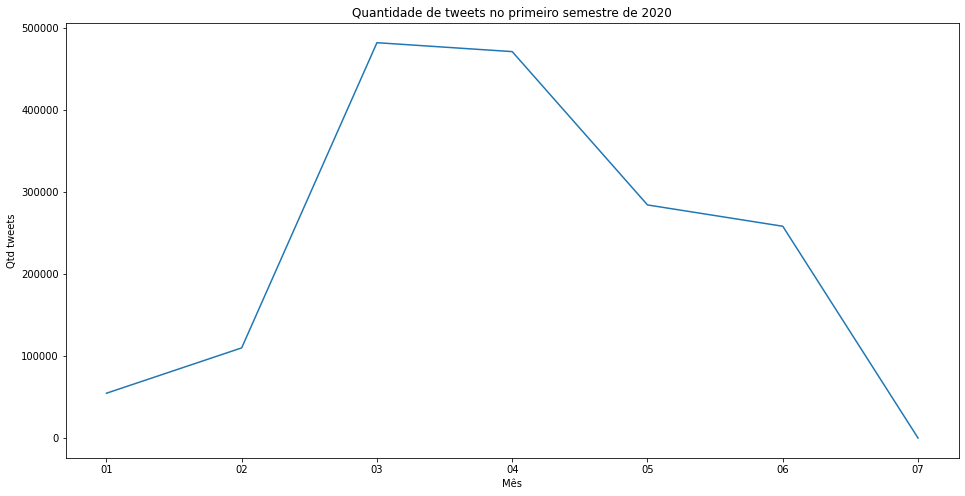

In [ ]:
# Quantidade de tweets por mês (sem contar a hora, minuto e segundo)
df_date = raw_data.groupby(pd.to_datetime(raw_data['data']).dt.strftime('%m'))['data'].count()
df_date
plt.figure(figsize=(16,8))
plt.title('Quantidade de tweets no primeiro semestre de 2020')
plt.plot(df_date)
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.show()

Observando o gráfico anterior, podemos visualizar que em janeiro já havia uma quantidade considerável de tuítes, provavelmente devido às notícias sobre os primeiros casos de COVID-19, ocorridos em Dezembro de 2019.
<br>
Como vimos anteriormente, o Brasil foi o país que mais produziu tuítes. Levando isso em consideração, o aumento na quantidade ao longo dos meses seguintes podem estar relacionados à notícias como o Projeto de Lei para a quarentena, aprovado pelo Congresso Nacional e o primeiro caso de COVID-19 registrado no país, no final de fevereiro - inclusive o pico (ponto mais alto) ocorreu nesse período, final de fereveiro e início de março.
<br>
Fonte das informações: https://coronavirus.saude.gov.br/linha-do-tempo/. 
<br>

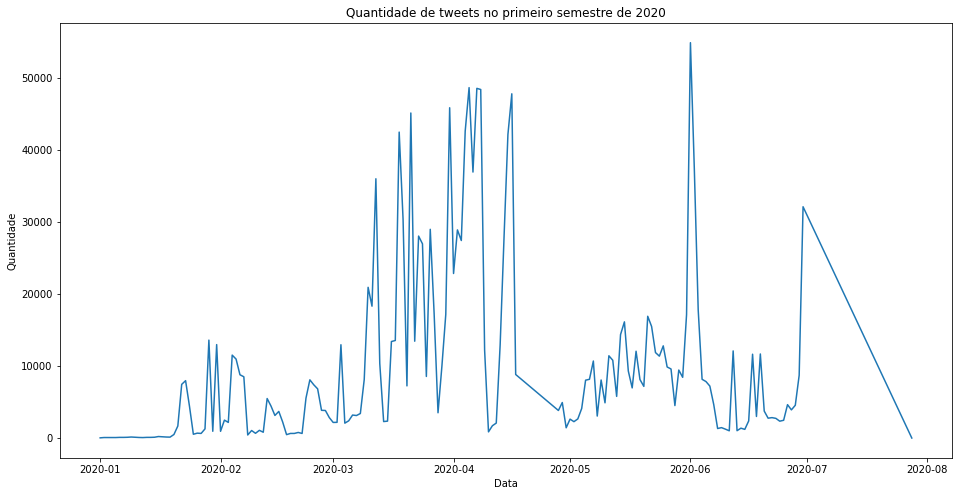

In [ ]:
# Quantidade de tweets por dias (sem contar a hora, minuto e segundo)
df_date = raw_data.groupby(pd.to_datetime(raw_data['data']).dt.date)['data'].count()
df_date
plt.figure(figsize=(16,8))
plt.title('Quantidade de tweets no primeiro semestre de 2020')
plt.plot(df_date)
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
maxdf = raw_data.groupby(pd.to_datetime(raw_data['data']).dt.date)['data'].count()
maxdf.idxmax()


datetime.date(2020, 6, 1)

Porém, mesmo o pico de tuítes ocorrendo no mês de março, quando visualizamos a quantidade em relação ao dia, podemos verificar que ocorreu no mês de junho, especificamente no dia 01-06-2020.

In [ ]:
# Quantidade de tweets por lugar

# Cópia dos dados
df_place = raw_data.loc[:]
df_place = df_place.groupby(["lugar"]).agg(
    qtd_tweets=pd.NamedAgg(column="lugar", aggfunc="count")
)
df_place.sort_values(by=['qtd_tweets'], ascending=False, inplace=True)
df_place.reset_index(inplace=True)
df_place.describe()


,qtd_tweets
count,4500.000000
mean,16.578889
std,187.688282
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,8443.000000


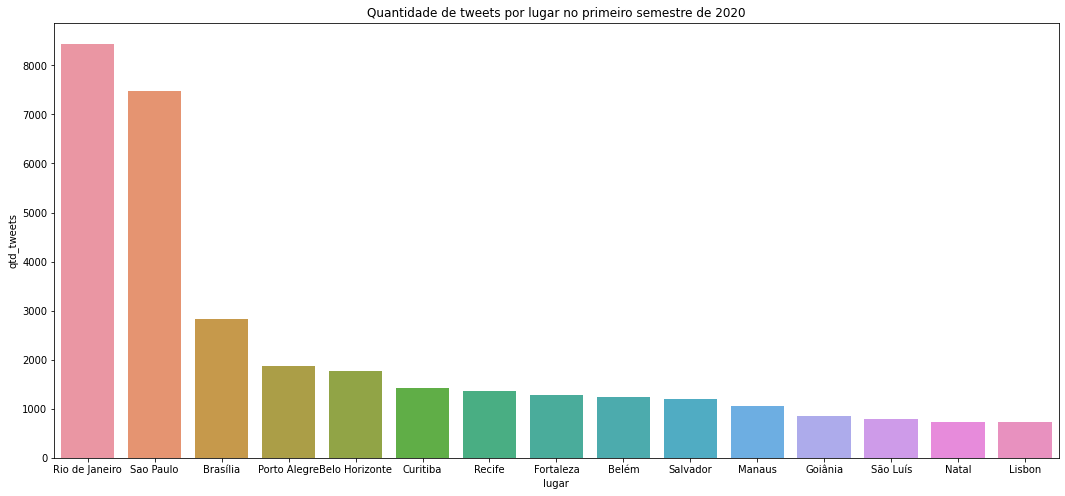

In [ ]:
# Quantidade de tweets por lugar

dims = (18, 8)
fig, ax = plt.subplots(figsize=dims)
ax.set_title('Quantidade de tweets por lugar no primeiro semestre de 2020')
ax = sns.barplot(x="lugar", y="qtd_tweets", data=df_place.iloc[0:15])

In [ ]:
df_fls = raw_data[:]
df_fls.sort_values(by=['seguidores'], ascending=False, inplace=True)
df_fls.reset_index(inplace=True)
df_fls

,index,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,788393,2020-05-23 23:08:17,Donald J. Trump,realDonaldTrump,"RT @RyanAFournier: This morning, Joe Biden sai...",21369,84241250,en,NaN,NaN,NaN,NaN,NaN,[]
1,610962,2020-05-12 09:40:41,Reuters,Reuters,Japanese author Murakami to DJ 'Stay Home' rad...,46,22098307,en,NaN,NaN,NaN,NaN,NaN,[]
2,113733,2020-04-16 15:40:07,CNN en Español,CNNEE,FDA pide a recuperados de covid-19 donar sangr...,139,18878720,pt,NaN,NaN,NaN,NaN,NaN,[]
3,1491980,2020-04-07 21:30:08,CNN en Español,CNNEE,Ronda global de noticias de coronavirus este 7...,22,18875851,pt,NaN,NaN,NaN,NaN,NaN,[]
4,1519974,2020-02-26 03:28:52,Danilo Gentili,DaniloGentili,@Fabiodedao Eu levarei a nova schin que aí vai...,0,17244348,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,1190679,2020-06-01 20:02:40,Carlos André Sardenberg Teixeira,CarlosAndrSard4,@Llucianealves @whindersson O Brasil é o pior ...,0,0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,1219334,2020-04-02 18:42:38,raul castro,raulcas78753615,@CCarloscoelho @tarcisiogdf @MInfraestrutura @...,0,0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,895859,2020-03-19 18:22:56,Cout1nh0,Cout1nh01,"@BolsonaroSP Para de falar merda, seu arrombad...",1,0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658823,1596157,2020-05-22 17:17:52,jaky.chen,jakychen3,@flyethiopian Take me to home,0,0,en,NaN,NaN,NaN,NaN,NaN,[]


Neste dataset, o usuário que possui mais seguidores é o presidente do Estados Unidos da América, Donald Trump, seguido pelas agências de notícias Reuters e CNN (Espanha).
<br>
No Brasil, o que possui mais seguidores é o humorista Danilo Gentili (seria essa uma boa piada?).

# Dataset DuvidasDB

In [35]:
# Geração de dataset DuvidasDB, selecionando registros que apresentem perguntas na coluna 'texto', a qual refere-se ao tuíte escrito pelo usuário
# Foi considerado como uma pergunta um texto que contenha os seguintes termos: '?', 'saber', 'conhece'

# Teste inicial
# duvidas_db = raw_data.query('texto.str.contains("\?")', engine='python')
duvidas_db = raw_data.set_index('texto').filter(regex='\?|saber|conhece', axis=0)
duvidas_db.reset_index(inplace=True)
duvidas_db

,texto,data,usuario,apelido,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,@BolsonaroSP Cade o fundão deputado??? Congres...,2020-03-23 18:51:14,Gaboardi,fraslee,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,Fumaça de cigarro pode propagar coronavírus? h...,2020-04-01 21:11:07,🚩,santosodeto,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
2,@ipratesMD @dr_pampers Será que corremos o ris...,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,0,86,pt,NaN,NaN,NaN,NaN,NaN,[]
3,Prioridade ?!\n\n #COVID19 #floripa #isolament...,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
4,"Que tal uma notícia boa, indo na contramão do ...",2020-03-30 00:43:36,Valnei do Val,vdoval,0,201,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184437,E ai quem são vcs durante a quarentena? \n\nEu...,2020-03-24 23:50:14,solineuza da diarista,gtstayhigh,0,1329,pt,NaN,NaN,NaN,NaN,NaN,[]
184438,"@0n3p1ece @alexmono Oh jumentinha, 1918 é isso...",2020-03-26 21:43:24,Chris CP,Chris_CP_,0,34,pt,NaN,NaN,NaN,NaN,NaN,[]
184439,@BiologiaBraba @Tati_Cordeiro Só vontade ou vo...,2020-05-25 22:53:13,O que houve com a couve?,couveluiza,0,1883,pt,NaN,NaN,NaN,NaN,NaN,[]
184440,oms: tamo tendo pandemia evitar\n conglomerado...,2020-03-13 17:26:18,broca,whoisdrill,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]


In [47]:
# import nltk.data
# tokenizer = nltk.data.load('tokenizers/punkt/PY3/portuguese.pickle') 
# tokenizer.tokenize(text) 

# Extraindo somente as perguntas dentro do texto

from nltk.tokenize import sent_tokenize
from re import search

duvidas_db['perguntas'] = duvidas_db['texto'].apply(lambda d: '.'.join([(q) for q in sent_tokenize(d, language='portuguese') if search("[\+?]", q)]))
duvidas_db


,texto,data,usuario,apelido,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,perguntas
0,@BolsonaroSP Cade o fundão deputado??? Congres...,2020-03-23 18:51:14,Gaboardi,fraslee,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],@BolsonaroSP Cade o fundão deputado???
1,Fumaça de cigarro pode propagar coronavírus? h...,2020-04-01 21:11:07,🚩,santosodeto,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],Fumaça de cigarro pode propagar coronavírus?
2,@ipratesMD @dr_pampers Será que corremos o ris...,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],@ipratesMD @dr_pampers Será que corremos o ris...
3,Prioridade ?!\n\n #COVID19 #floripa #isolament...,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",Prioridade ?!
4,"Que tal uma notícia boa, indo na contramão do ...",2020-03-30 00:43:36,Valnei do Val,vdoval,0,201,pt,NaN,NaN,NaN,NaN,NaN,[],"Que tal uma notícia boa, indo na contramão do ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184437,E ai quem são vcs durante a quarentena? \n\nEu...,2020-03-24 23:50:14,solineuza da diarista,gtstayhigh,0,1329,pt,NaN,NaN,NaN,NaN,NaN,[],E ai quem são vcs durante a quarentena?
184438,"@0n3p1ece @alexmono Oh jumentinha, 1918 é isso...",2020-03-26 21:43:24,Chris CP,Chris_CP_,0,34,pt,NaN,NaN,NaN,NaN,NaN,[],"@0n3p1ece @alexmono Oh jumentinha, 1918 é isso??"
184439,@BiologiaBraba @Tati_Cordeiro Só vontade ou vo...,2020-05-25 22:53:13,O que houve com a couve?,couveluiza,0,1883,pt,NaN,NaN,NaN,NaN,NaN,[],@BiologiaBraba @Tati_Cordeiro Só vontade ou vo...
184440,oms: tamo tendo pandemia evitar\n conglomerado...,2020-03-13 17:26:18,broca,whoisdrill,0,361,pt,NaN,NaN,NaN,NaN,NaN,[],oms: tamo tendo pandemia evitar\n conglomerado...


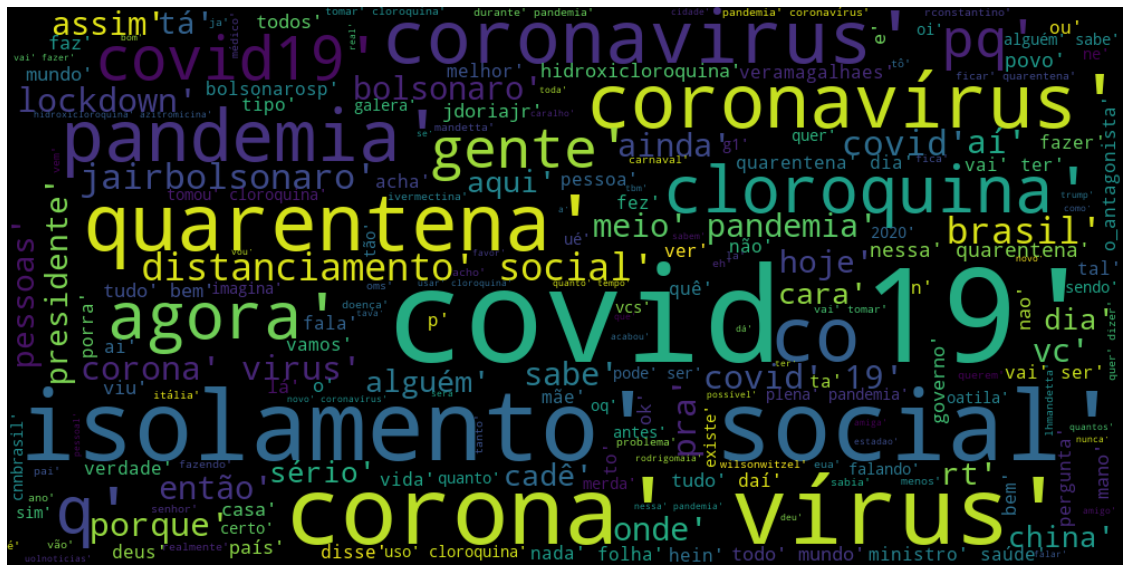

In [55]:
gen_img_word_cloud(duvidas_db['perguntas'])